# **Apex Legends K/D Prediction Project**

# **Imports**

In [1]:
#Numpy
import numpy as np
from numpy import median

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt

#Preprocessor
from numpy import median
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

#Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Regression metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Set global scikit-learn configuration
from sklearn import set_config

#Display estimators as a diagram
set_config(display='diagram')

#Warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading Data**

In [2]:
joe_df= pd.read_csv("/Users/davyd/OneDrive/Documents/Apex_Data_Joe.csv")
joe_df.info()
joe_df.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               24 non-null     object 
 1   Total Damage         23 non-null     float64
 2   Total Kills          23 non-null     float64
 3   Total Deaths         23 non-null     float64
 4   K/D Ratio            23 non-null     float64
 5   Total wins           23 non-null     float64
 6   Total Top 5 finish   23 non-null     float64
 7   Total Games Played   23 non-null     float64
 8   Highest Kills        23 non-null     float64
 9   Knockdowns           23 non-null     float64
 10  Assists              23 non-null     float64
 11  Teamates Revived     23 non-null     float64
 12  Allayna Playing      23 non-null     object 
 13  Teammates Respawned  23 non-null     float64
 14  Win Streak           22 non-null     float64
 15  Ranked Split 1       11 non-null     objec

,Season,Total Damage,Total Kills,Total Deaths,K/D Ratio,Total wins,Total Top 5 finish,Total Games Played,Highest Kills,Knockdowns,Assists,Teamates Revived,Allayna Playing,Teammates Respawned,Win Streak,Ranked Split 1,Ranked Split 2,Win rate%
0,5,8332.0,20.0,50.0,0.40,1.0,12.0,49.0,5.0,21.0,12.0,6.0,no,0.0,1.0,NaN,NaN,2.04%
1,6,2945.0,7.0,16.0,0.44,0.0,2.0,15.0,2.0,7.0,2.0,0.0,no,0.0,0.0,NaN,NaN,0%
2,7,111421.0,234.0,543.0,0.43,19.0,139.0,525.0,5.0,318.0,179.0,68.0,no,15.0,2.0,NaN,NaN,3.62%
3,7R,32709.0,68.0,169.0,0.40,6.0,51.0,167.0,4.0,89.0,47.0,24.0,no,5.0,2.0,gold 4,silver 4,3.59%
4,8,168498.0,383.0,811.0,0.47,24.0,200.0,773.0,8.0,522.0,271.0,144.0,no,31.0,2.0,NaN,NaN,3.10%
5,8R,55867.0,127.0,308.0,0.41,8.0,72.0,292.0,5.0,182.0,96.0,50.0,no,9.0,2.0,bronze 1,gold 4,2.74%
6,9,103180.0,261.0,404.0,0.65,21.0,118.0,408.0,7.0,354.0,159.0,101.0,no,19.0,2.0,NaN,NaN,5.15%
7,9R,18689.0,49.0,66.0,0.74,9.0,28.0,64.0,4.0,62.0,29.0,17.0,no,3.0,2.0,bronze2,gold 4,14.06%
8,10,64975.0,164.0,245.0,0.67,13.0,68.0,242.0,5.0,210.0,91.0,54.0,no,3.0,1.0,NaN,NaN,5.37%
9,10R,5910.0,11.0,16.0,0.69,1.0,4.0,15.0,3.0,12.0,8.0,3.0,no,0.0,1.0,silver 4,bronze4,6.67%


In [3]:
joe_df['Cal K/D'] = joe_df['Total Kills']/joe_df['Total Deaths']

In [4]:
joe_df['Top 5 %'] = joe_df['Total Games Played']/joe_df['Total Top 5 finish']

In [5]:
joe_df['kill/knock ratio'] = joe_df['Total Kills']/joe_df['Knockdowns']

In [6]:
print(joe_df)

             Season  Total Damage  Total Kills  Total Deaths  K/D Ratio  \
0                 5        8332.0         20.0          50.0       0.40   
1                 6        2945.0          7.0          16.0       0.44   
2                 7      111421.0        234.0         543.0       0.43   
3                7R       32709.0         68.0         169.0       0.40   
4                 8      168498.0        383.0         811.0       0.47   
5                8R       55867.0        127.0         308.0       0.41   
6                 9      103180.0        261.0         404.0       0.65   
7                9R       18689.0         49.0          66.0       0.74   
8                10       64975.0        164.0         245.0       0.67   
9               10R        5910.0         11.0          16.0       0.69   
10               11      245509.0        549.0         825.0       0.67   
11              11R       44620.0         90.0         151.0       0.60   
12               12      

In [7]:
#Saving the new dataframe to upload in the next notebook
joe_df.to_csv('Joe_data_frame', index=False)

In [8]:
joe_df.head()

,Season,Total Damage,Total Kills,Total Deaths,K/D Ratio,Total wins,Total Top 5 finish,Total Games Played,Highest Kills,Knockdowns,...,Teamates Revived,Allayna Playing,Teammates Respawned,Win Streak,Ranked Split 1,Ranked Split 2,Win rate%,Cal K/D,Top 5 %,kill/knock ratio
0,5,8332.0,20.0,50.0,0.40,1.0,12.0,49.0,5.0,21.0,...,6.0,no,0.0,1.0,NaN,NaN,2.04%,0.400000,4.083333,0.952381
1,6,2945.0,7.0,16.0,0.44,0.0,2.0,15.0,2.0,7.0,...,0.0,no,0.0,0.0,NaN,NaN,0%,0.437500,7.500000,1.000000
2,7,111421.0,234.0,543.0,0.43,19.0,139.0,525.0,5.0,318.0,...,68.0,no,15.0,2.0,NaN,NaN,3.62%,0.430939,3.776978,0.735849
3,7R,32709.0,68.0,169.0,0.40,6.0,51.0,167.0,4.0,89.0,...,24.0,no,5.0,2.0,gold 4,silver 4,3.59%,0.402367,3.274510,0.764045
4,8,168498.0,383.0,811.0,0.47,24.0,200.0,773.0,8.0,522.0,...,144.0,no,31.0,2.0,NaN,NaN,3.10%,0.472256,3.865000,0.733716


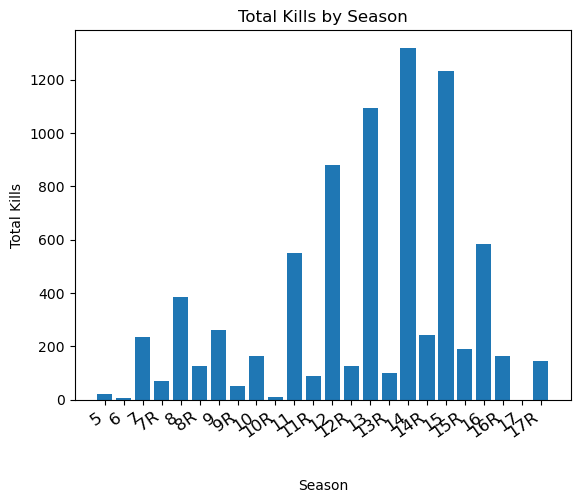

In [9]:
plt.bar(joe_df['Season'], joe_df['Total Kills'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Total Kills')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Total Kills by Season')

# Show the plot
plt.show()

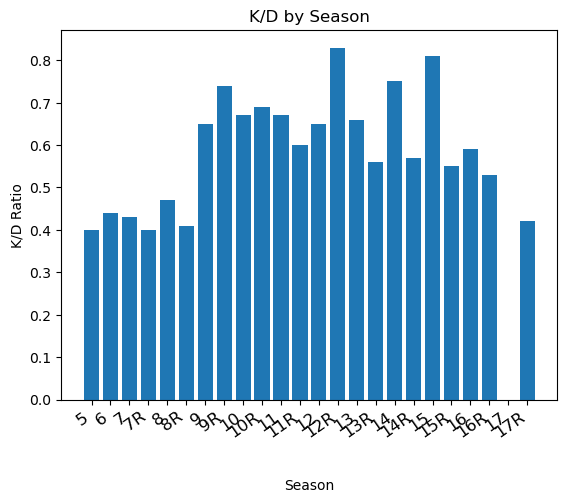

In [10]:
plt.bar(joe_df['Season'], joe_df['K/D Ratio'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('K/D Ratio')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('K/D by Season')

# Show the plot
plt.show()

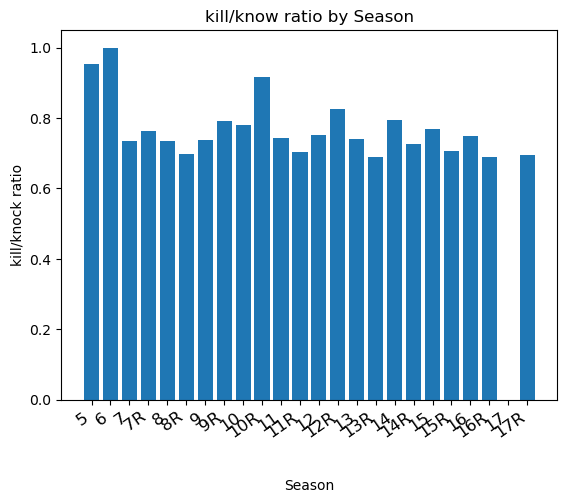

In [11]:
plt.bar(joe_df['Season'], joe_df['kill/knock ratio'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('kill/knock ratio')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('kill/know ratio by Season')

# Show the plot
plt.show()

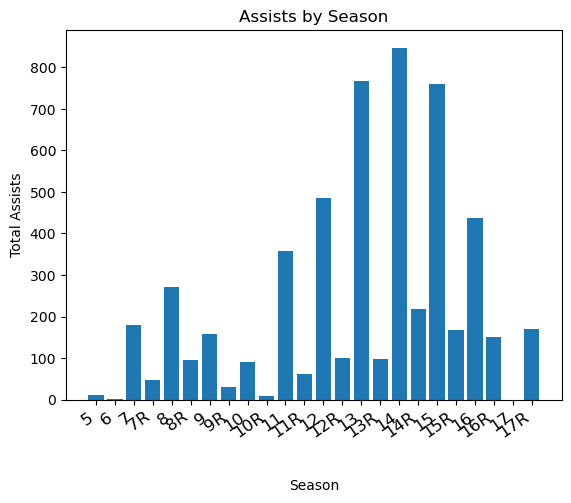

In [13]:
plt.bar(joe_df['Season'], joe_df['Assists'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Total Assists')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Assists by Season')

# Show the plot
plt.show()

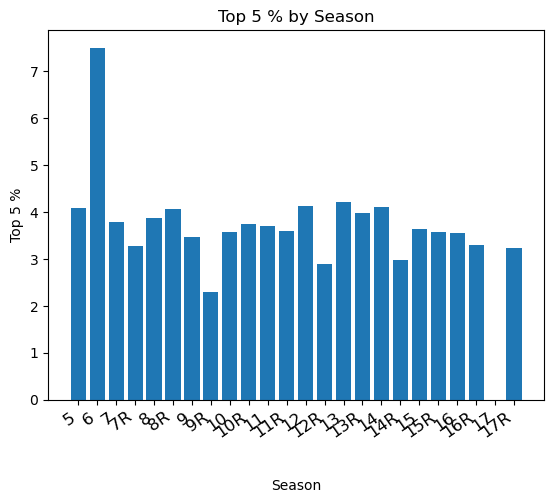

In [15]:
plt.bar(joe_df['Season'], joe_df['Top 5 %'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Top 5 %')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Top 5 % by Season')

# Show the plot
plt.show()